# Importing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import seaborn as sn
from sklearn.model_selection import train_test_split

# Mounting

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read Dataset

In [4]:
url = '/content/drive/My Drive/Colab Notebooks/datasets/firmware.csv'

In [5]:
df = pd.read_csv(url)
df.head()

,filename,class,target,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,...,pixel986,pixel987,pixel988,pixel989,pixel990,pixel991,pixel992,pixel993,pixel994,pixel995,pixel996,pixel997,pixel998,pixel999,pixel1000,pixel1001,pixel1002,pixel1003,pixel1004,pixel1005,pixel1006,pixel1007,pixel1008,pixel1009,pixel1010,pixel1011,pixel1012,pixel1013,pixel1014,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024,Unnamed: 1027
0,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,238,51,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,NaN
1,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,102,34,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,68,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,0,0,0,34,0,0,0,NaN
2,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,238,51,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,NaN
3,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,102,34,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,68,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,0,0,0,34,0,0,0,NaN
4,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,34,0,0,0,0,0,0,0,0,0,0,0,NaN


# Pre-processing


In [6]:
df = df.drop(columns=['filename', 'class'])
df.head()

,target,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel986,pixel987,pixel988,pixel989,pixel990,pixel991,pixel992,pixel993,pixel994,pixel995,pixel996,pixel997,pixel998,pixel999,pixel1000,pixel1001,pixel1002,pixel1003,pixel1004,pixel1005,pixel1006,pixel1007,pixel1008,pixel1009,pixel1010,pixel1011,pixel1012,pixel1013,pixel1014,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024,Unnamed: 1027
0,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,238,51,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,NaN
1,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,102,34,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,68,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,0,0,0,34,0,0,0,NaN
2,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,238,51,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,NaN
3,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,102,34,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,68,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,0,0,0,34,0,0,0,NaN
4,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,34,0,0,0,0,0,0,0,0,0,0,0,NaN


In [7]:
df = df.dropna(axis='columns')
df.head()

,target,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel985,pixel986,pixel987,pixel988,pixel989,pixel990,pixel991,pixel992,pixel993,pixel994,pixel995,pixel996,pixel997,pixel998,pixel999,pixel1000,pixel1001,pixel1002,pixel1003,pixel1004,pixel1005,pixel1006,pixel1007,pixel1008,pixel1009,pixel1010,pixel1011,pixel1012,pixel1013,pixel1014,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
0,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,238,51,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0
1,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,102,34,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,68,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,0,0,0,34,0,0,0
2,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,238,51,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0
3,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,102,34,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,68,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,0,0,0,34,0,0,0
4,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,204,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,34,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df_label = df['target']
df = df.drop(columns=['target'])
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel985,pixel986,pixel987,pixel988,pixel989,pixel990,pixel991,pixel992,pixel993,pixel994,pixel995,pixel996,pixel997,pixel998,pixel999,pixel1000,pixel1001,pixel1002,pixel1003,pixel1004,pixel1005,pixel1006,pixel1007,pixel1008,pixel1009,pixel1010,pixel1011,pixel1012,pixel1013,pixel1014,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
0,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,238,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0
1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,102,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,68,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,0,0,0,34,0,0,0
2,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,238,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0
3,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,102,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,68,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,0,0,0,34,0,0,0
4,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,204,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,34,0,0,0,0,0,0,0,0,0,0,0


In [9]:
data = df.to_numpy()
data = np.reshape(data, (-1, 32,32))
data

array([[[ 85,  17,  34, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [ 85,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[ 85,  17,  34, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [ 68,   0,   0, ...,   0,   0,   0]],

       [[ 85,  17,  34, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [ 85,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[ 85,  17,  34, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,  17,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [10]:
data.shape

(38887, 32, 32)

In [11]:
labels = df_label.to_numpy()

# Splitting Dataset

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=30)

In [13]:
x_train.shape

(31109, 32, 32)

In [14]:
y_train.shape

(31109,)

# Testing NN

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(3, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
973/973 [==============================] - 3s 2ms/step - loss: 0.2229 - accuracy: 0.9909
Epoch 2/5
973/973 [==============================] - 2s 2ms/step - loss: 0.0153 - accuracy: 0.9984
Epoch 3/5
973/973 [==============================] - 2s 2ms/step - loss: 0.0373 - accuracy: 0.9976
Epoch 4/5
973/973 [==============================] - 2s 2ms/step - loss: 0.0045 - accuracy: 0.9994
Epoch 5/5
973/973 [==============================] - 2s 2ms/step - loss: 0.0241 - accuracy: 0.9985


In [ ]:
model.evaluate(x_test, y_test)

244/244 [==============================] - 1s 2ms/step - loss: 0.0209 - accuracy: 0.9994


[0.020920218899846077, 0.9993571639060974]

In [ ]:
y_predict = model.predict(x_test)
y_predict[0]

array([1.0000000e+00, 1.6230427e-15, 4.3841226e-37], dtype=float32)

In [ ]:
np.argmax(y_predict[0])

0

In [ ]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[0, 0, 0, 0, 0]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)
cm

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[7624,    3,    0],
       [   0,  131,    0],
       [   4,    6,   10]], dtype=int32)>

Text(69.0, 0.5, 'True')

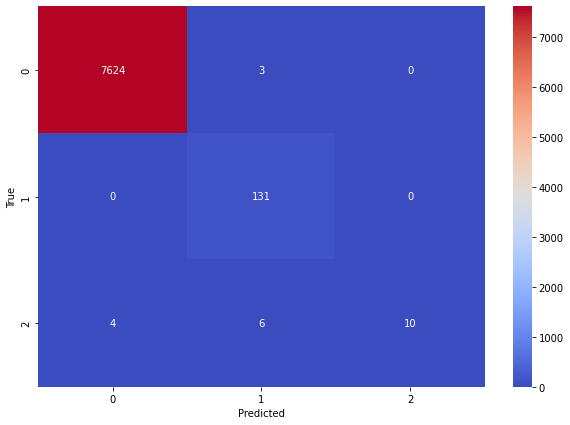

In [ ]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d', cmap="coolwarm")
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_predict_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7627
           1       0.94      1.00      0.97       131
           2       1.00      0.50      0.67        20

    accuracy                           1.00      7778
   macro avg       0.98      0.83      0.88      7778
weighted avg       1.00      1.00      1.00      7778



# ANN

In [15]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(3, activation='sigmoid')
])

adam = keras.optimizers.Adam(learning_rate=0.001)
ann.compile(
    optimizer=adam,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ann_history = ann.fit(x_train, y_train, epochs=5, batch_size=20)

Epoch 1/5
1556/1556 [==============================] - 8s 4ms/step - loss: 0.0530 - accuracy: 0.9904
Epoch 2/5
1556/1556 [==============================] - 7s 4ms/step - loss: 0.0064 - accuracy: 0.9988
Epoch 3/5
1556/1556 [==============================] - 6s 4ms/step - loss: 0.0082 - accuracy: 0.9982
Epoch 4/5
1556/1556 [==============================] - 6s 4ms/step - loss: 0.0024 - accuracy: 0.9996
Epoch 5/5
1556/1556 [==============================] - 6s 4ms/step - loss: 0.0084 - accuracy: 0.9988


In [16]:
ann_history.history

{'accuracy': [0.9904207587242126,
  0.9987784624099731,
  0.9981998801231384,
  0.9996142387390137,
  0.9988106489181519],
 'loss': [0.0530347041785717,
  0.006356272380799055,
  0.008208813145756721,
  0.0024123466573655605,
  0.008433896116912365]}

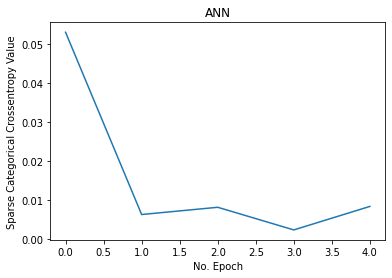

In [17]:
plt.plot(ann_history.history['loss'])
plt.title('ANN')
plt.ylabel('Sparse Categorical Crossentropy Value')
plt.xlabel('No. Epoch')
plt.show()

In [18]:
ann.evaluate(x_test, y_test)

244/244 [==============================] - 1s 3ms/step - loss: 0.0018 - accuracy: 0.9997


[0.0018230798887088895, 0.999742865562439]

In [19]:
y_predict = ann.predict(x_test)
y_predict_labels = [np.argmax(i) for i in y_predict]

In [25]:
from sklearn import metrics
print ('Accuracy: ', metrics.accuracy_score(y_test, y_predict_labels))
print ('Precision: ', metrics.precision_score(y_test, y_predict_labels, average='micro'))
print ('Recall: ', metrics.recall_score(y_test, y_predict_labels, average='micro'))
print ('F1-score: ', metrics.f1_score(y_test, y_predict_labels, average='micro'))

Accuracy:  0.999742864489586
Precision:  0.999742864489586
Recall:  0.999742864489586
F1-score:  0.999742864489586


# CNN



In [26]:
cnn = keras.Sequential([
    # cnn
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)),
    keras.layers.MaxPooling2D((2, 2)),

    # dense
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='sigmoid')
])

adam = keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(
    optimizer=adam,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn_history = cnn.fit(x_train, y_train, epochs=5, batch_size=20)

Epoch 1/5
1556/1556 [==============================] - 15s 5ms/step - loss: 0.1911 - accuracy: 0.9922
Epoch 2/5
1556/1556 [==============================] - 8s 5ms/step - loss: 0.0136 - accuracy: 0.9978
Epoch 3/5
1556/1556 [==============================] - 7s 4ms/step - loss: 0.0083 - accuracy: 0.9983
Epoch 4/5
1556/1556 [==============================] - 7s 4ms/step - loss: 0.0051 - accuracy: 0.9990
Epoch 5/5
1556/1556 [==============================] - 7s 4ms/step - loss: 2.4270e-05 - accuracy: 1.0000


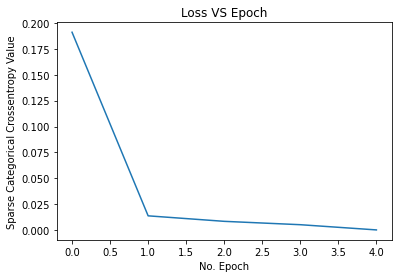

In [27]:
plt.plot(cnn_history.history['loss'])
plt.title('Loss VS Epoch')
plt.ylabel('Sparse Categorical Crossentropy Value')
plt.xlabel('No. Epoch')
plt.show()

In [28]:
cnn.evaluate(x_test, y_test)

244/244 [==============================] - 1s 3ms/step - loss: 1.9152e-04 - accuracy: 0.9999


[0.00019151662127114832, 0.9998714327812195]

In [29]:
y_predict = cnn.predict(x_test)
y_predict_labels = [np.argmax(i) for i in y_predict]

In [30]:
from sklearn import metrics
print ('Accuracy: ', metrics.accuracy_score(y_test, y_predict_labels))
print ('Precision: ', metrics.precision_score(y_test, y_predict_labels, average='micro'))
print ('Recall: ', metrics.recall_score(y_test, y_predict_labels, average='micro'))
print ('F1-score: ', metrics.f1_score(y_test, y_predict_labels, average='micro'))

Accuracy:  0.999871432244793
Precision:  0.999871432244793
Recall:  0.999871432244793
F1-score:  0.999871432244793


# Loss VS Epoch

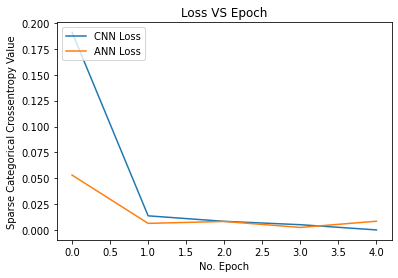

In [31]:
plt.plot(cnn_history.history['loss'], label='CNN Loss')
plt.plot(ann_history.history['loss'], label='ANN Loss')
plt.title('Loss VS Epoch')
plt.ylabel('Sparse Categorical Crossentropy Value')
plt.xlabel('No. Epoch')
plt.legend(loc="upper left")
plt.show()